In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# https://machinelearningmastery.com/xgboost-for-regression/
# !pip install xgboost
from xgboost import XGBRFRegressor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv("../dataset/Train_Data.csv") 
data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


# Data Exploration

In [3]:
data.shape

(3630, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


# Statistical Summary

In [5]:
data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
categorical_variables = data.select_dtypes(include='object').columns
categorical_variables

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
numarical_variables = data.select_dtypes(include = ['float64','int64']).columns
numarical_variables

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

# Dealing With Missing Values

In [8]:
data.isnull().any()

age         False
sex         False
bmi         False
smoker      False
region      False
children    False
charges     False
dtype: bool

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

# Encoding The Catogorical Data

In [10]:
for cv in categorical_variables:
    print(f"Column {cv} have {data[cv].nunique()} unique values are {data[cv].unique()}.")

Column sex have 2 unique values are ['male' 'female'].
Column smoker have 2 unique values are ['no' 'yes'].
Column region have 4 unique values are ['northeast' 'southeast' 'northwest' 'southwest'].


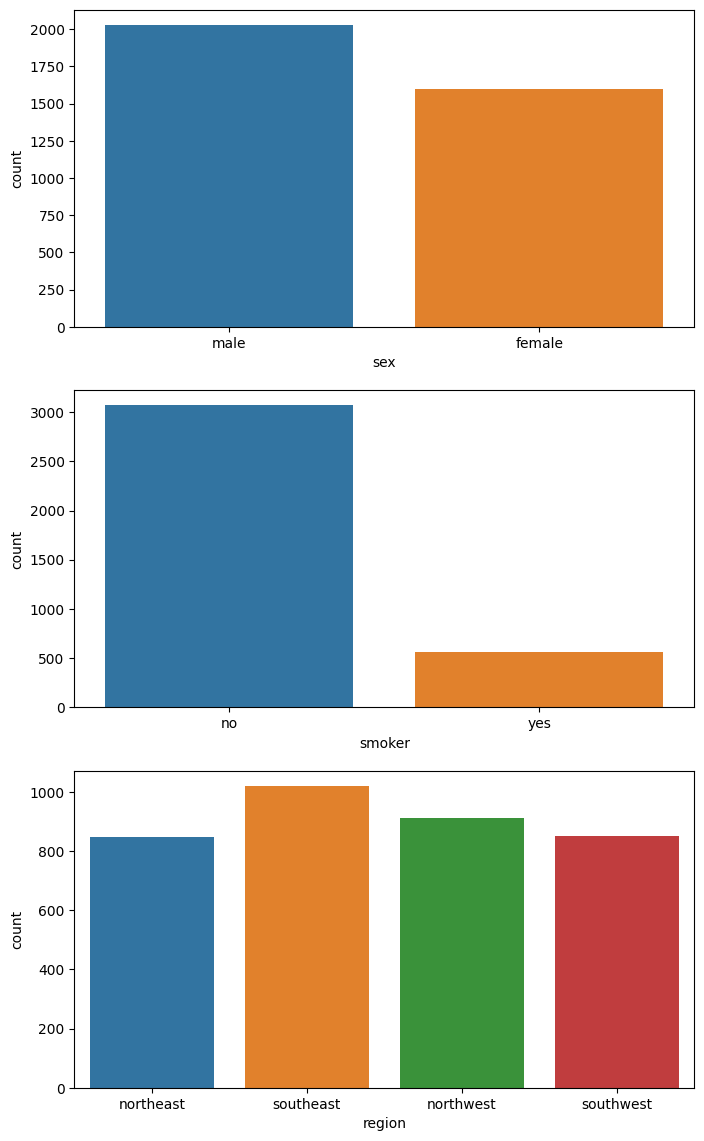

In [11]:
plt.figure(figsize=(8, 14))

plt.subplot(3, 1, 1)
sns.countplot(x='sex', data=data)

plt.subplot(3, 1, 2)
sns.countplot(x='smoker', data=data)

plt.subplot(3, 1, 3)
sns.countplot(x='region', data=data)

plt.show()

In [12]:
data['sex'] = data['sex'].replace({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})

# One Hot Encoding.
data = pd.get_dummies(data=data, drop_first=True, dtype=int)
data.head()

,age,sex,bmi,smoker,children,charges,region_northwest,region_southeast,region_southwest
0,21.000000,1,25.745000,0,2,3279.868550,0,0,0
1,36.976978,0,25.744165,1,3,21454.494239,0,1,0
2,18.000000,1,30.030000,0,1,1720.353700,0,1,0
3,37.000000,1,30.676891,0,3,6801.437542,0,0,0
4,58.000000,1,32.010000,0,1,11946.625900,0,1,0


In [13]:
data.shape

(3630, 9)

# Correlation Matrix

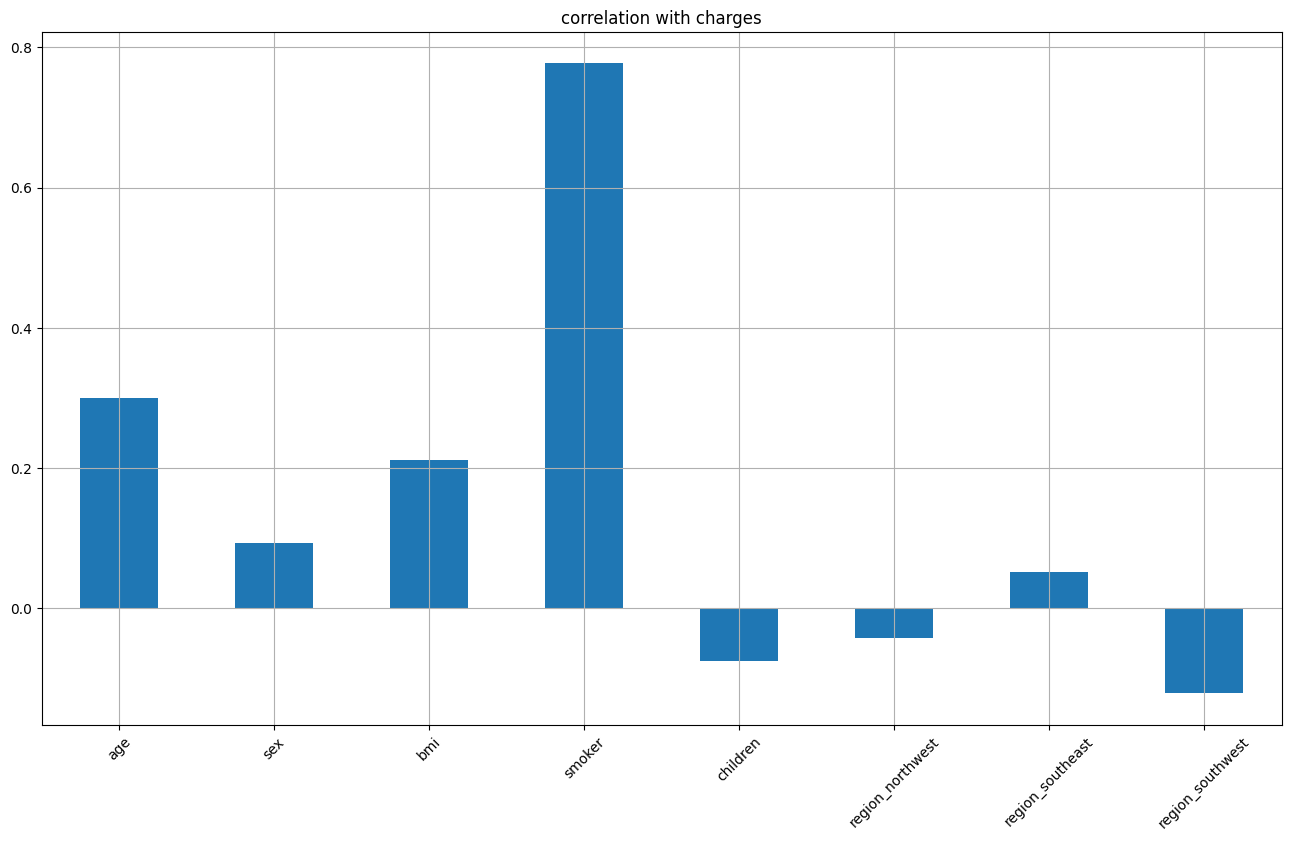

In [16]:
data_2 = data.drop(columns = 'charges')
data_2.corrwith(data['charges']).plot.bar(
    figsize = (16,9),
    title = 'correlation with charges',
    rot = 45,
    grid = True)
plt.show()

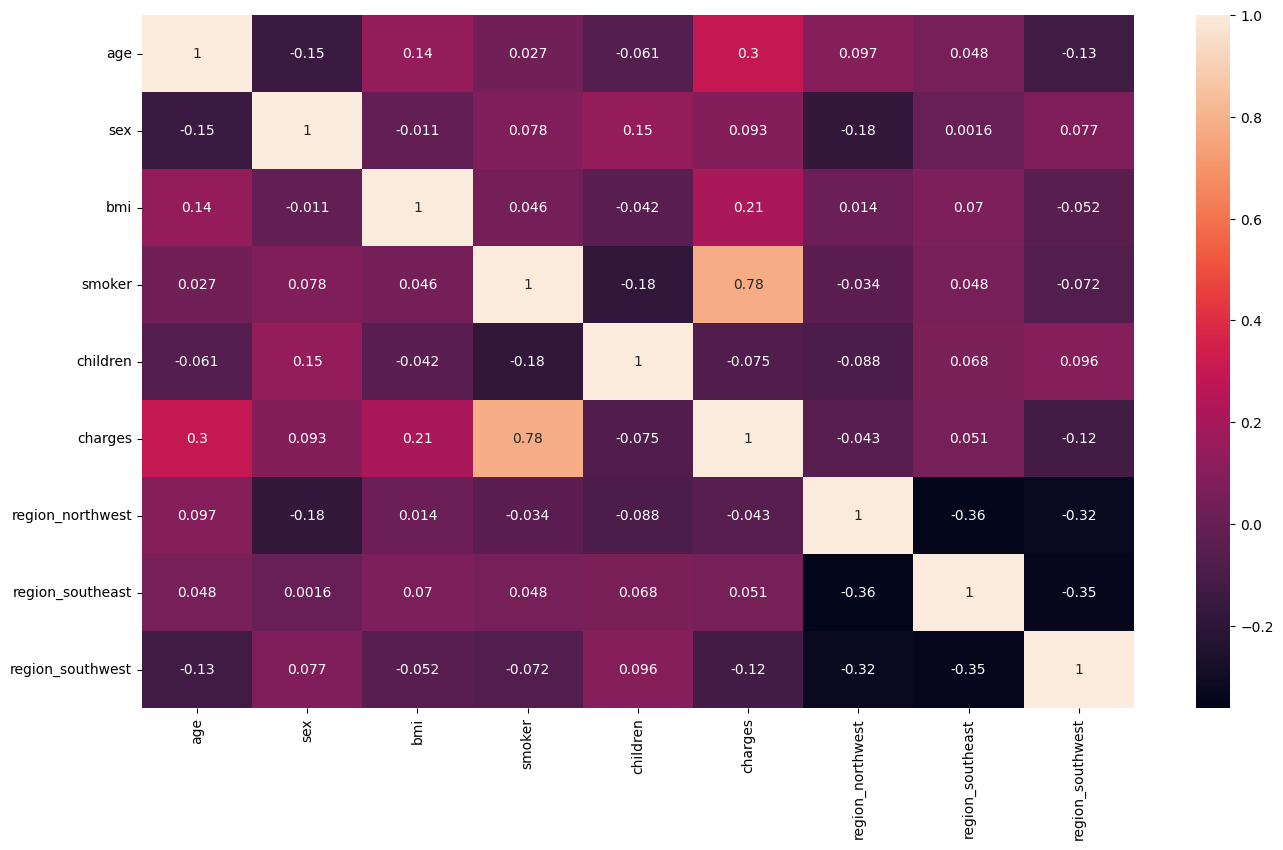

In [17]:
corr = data.corr()
# HeatMap
plt.figure(figsize= (16,9))
sns.heatmap(corr, annot = True)
plt.show()

# Splitting The Dataset

In [18]:
# Matrix Of Features / Indipendent Variable.
x = data.drop(columns = 'charges')
y = data['charges']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [20]:
x_train.shape, y_train.shape

((2904, 8), (2904,))

In [21]:
x_test.shape, y_test.shape

((726, 8), (726,))

# Feature Scaling

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train

array([[ 0.07355122,  0.88407867, -0.83189118, ..., -0.5784106 ,
         1.58075779, -0.54657823],
       [-1.63917845, -1.13112106, -0.49128613, ...,  1.72887564,
        -0.63260799, -0.54657823],
       [ 0.79070429, -1.13112106,  1.34489991, ...,  1.72887564,
        -0.63260799, -0.54657823],
       ...,
       [ 1.41246219, -1.13112106, -0.36881909, ..., -0.5784106 ,
        -0.63260799, -0.54657823],
       [-1.68141994,  0.88407867, -0.811251  , ...,  1.72887564,
        -0.63260799, -0.54657823],
       [-0.18831608,  0.88407867, -0.26654522, ..., -0.5784106 ,
        -0.63260799,  1.82956426]])

In [24]:
x_test

array([[-7.21197401e-02, -1.13112106e+00, -4.78394867e-01, ...,
        -5.78410601e-01, -6.32607986e-01,  1.82956426e+00],
       [ 8.33119501e-01, -1.13112106e+00,  2.00117886e+00, ...,
         1.72887564e+00, -6.32607986e-01, -5.46578232e-01],
       [-9.79364255e-01, -1.13112106e+00, -1.41794069e-03, ...,
        -5.78410601e-01, -6.32607986e-01, -5.46578232e-01],
       ...,
       [-1.13194125e+00,  8.84078668e-01, -1.21226772e+00, ...,
        -5.78410601e-01, -6.32607986e-01,  1.82956426e+00],
       [ 2.57787356e-01, -1.13112106e+00, -8.13567842e-01, ...,
        -5.78410601e-01,  1.58075779e+00, -5.46578232e-01],
       [-1.55670167e+00,  8.84078668e-01, -6.07307549e-01, ...,
        -5.78410601e-01, -6.32607986e-01,  1.82956426e+00]])

# Building The Model

## Multiple Linear Regression.

In [25]:
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor_lr.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.7318413427650639

## Random Forest Regression

In [28]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
y_pred = regressor_rf.predict(x_test)

In [30]:
r2_score(y_test, y_pred)

0.8875525224230342

## XGBoost regression

In [31]:
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [32]:
y_pred = regressor_xgb.predict(x_test)

In [33]:
r2_score(y_test, y_pred)

0.8678633362678325

# Predict Charges For New Customer

In [34]:
data.head()

,age,sex,bmi,smoker,children,charges,region_northwest,region_southeast,region_southwest
0,21.000000,1,25.745000,0,2,3279.868550,0,0,0
1,36.976978,0,25.744165,1,3,21454.494239,0,1,0
2,18.000000,1,30.030000,0,1,1720.353700,0,1,0
3,37.000000,1,30.676891,0,3,6801.437542,0,0,0
4,58.000000,1,32.010000,0,1,11946.625900,0,1,0


In [55]:
new_obs1 = [[40, 1, 45.5, 1, 4, 0, 0, 0]] # [[40, 45.5,4,1,1,0,0,0]]
regressor_rf.predict(sc.transform(new_obs1))

array([39924.90760539])

In [48]:
new_obs2 = [[19, 0, 27.9, 0, 0, 1, 0, 0]] # [[19, 27.9,0,0,0,1,0,0]]
regressor_rf.predict(sc.transform(new_obs2))

array([2340.95092099])

In [37]:
# [[age, sex, bmi, smoker, children, region_northwest, region_southeast, region_southwest]]

# Save model

In [40]:
import pickle
pickle.dump(regressor_rf, open('../model/medical_insurance_cost_forecast_model.pkl', 'wb'))

In [43]:
pickled_model = pickle.load(open('../model/medical_insurance_cost_forecast_model.pkl', 'rb'))
y_pred = pickled_model.predict(x_test)
r2_score(y_test, y_pred)

0.8875525224230342

In [59]:
pickled_model.predict(sc.transform([[32, 1, 20.9, 0, 0, 0, 0, 0]]))

array([8761.07146634])